In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

import importlib
import lib.ting_utils
import lib.my_time
importlib.reload(lib.my_time)
from lib.ting_utils import getTingMeasurementsFromFile
from lib.my_time import Time

In [3]:
path = 'csvs/measurements/raw/'
files = os.listdir(path)
dfs = [pd.read_csv(path+f) for f in files if ".csv" in f]

## 4.1.2  Signal reformatting

In [93]:
df_0 = dfs[12]
df_1 = dfs[13]
df_2 = dfs[14]

In [94]:
# NEW
x_0 = [Time(x).time for x in df_0['datetime']][:180]
# x_1 = [Time(x).time for x in df_1['datetime']][:180]
# x_2 = [Time(x).time for x in df_2['datetime']][:180]
#x_new = range(180)
#x_ticks = ['12:30']+['']*44 + ['12:45']+['']*44 + ['13:00']+['']*44 + ['13:15']+['']*43 + ['13:30']
y_0 = df_0['rtt']
y_0 = [y if y>0 else 60 for y in y_0][:180]
y_1 = df_1['rtt']
y_1 = [y if y>0 else 60 for y in y_1][:180]
y_2 = df_2['rtt']
y_2 = [y if y>0 else 60 for y in y_2][:180]

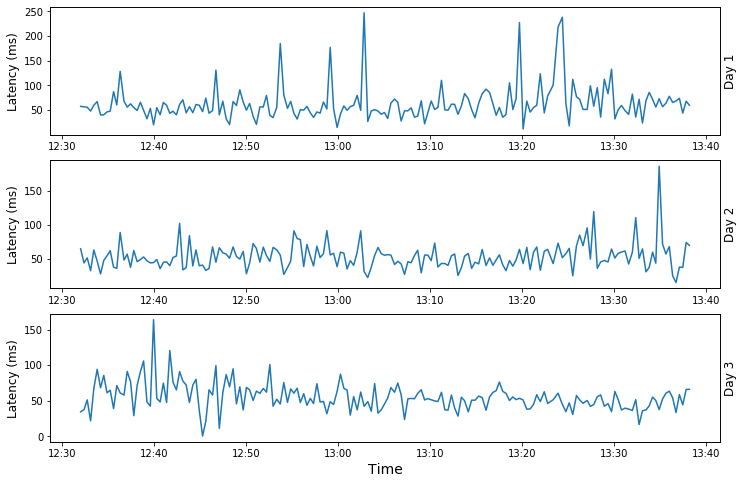

In [121]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(3, figsize=(12,8))

# 0
ax[0].plot(x_0, y_0)
#ax[0].set_title('Day 1', size=14, pad=6)
ax[0].set_ylabel('Latency (ms)', size=12)
axt1 = ax[0].twinx()
axt1.set_ylabel('Day 1', size=12)
axt1.set_yticks([])
#ax[0].set_xlabel('Time', size=12)

# 2
ax[1].plot(x_0, y_1)
#ax[1].set_title('Day 2', size=14, pad=6)
ax[1].set_ylabel('Latency (ms)', size=12)
axt2 = ax[1].twinx()
axt2.set_ylabel('Day 2', size=12)
axt2.set_yticks([])
#ax[0].set_xlabel('Time', size=12)

# 3
ax[2].plot(x_0, y_2)
#ax[2].set_title('Day 3', size=14, pad=1)
ax[2].set_ylabel('Latency (ms)', size=12)
axt3 = ax[2].twinx()
axt3.set_ylabel('Day 3', size=12)
axt3.set_yticks([])
ax[2].set_xlabel('Time', size=14)

# # rotate and align the tick labels so they look better
# #fig.autofmt_xdate()
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.savefig('figures/signal_formatting.png')